<a href="https://colab.research.google.com/github/audreyakwenye/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [79]:
import pandas as pd
import numpy as np
from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean

survival_data = pd.read_table('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data')
survival_data.head()

col_names=['Age', 'Op Year', 'Nodes', 'Status'] 
survival_data2 = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', names=col_names, header=None)

survival_data2.shape
survival_data2.head()

# TODO

,Age,Op Year,Nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

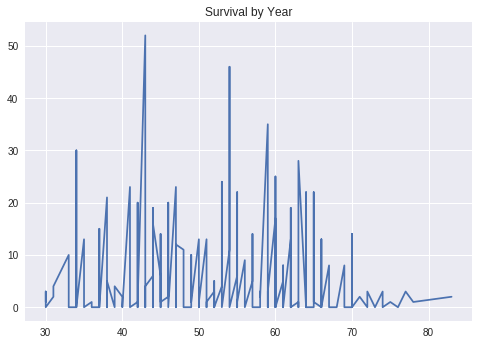

In [78]:
#table one 

from matplotlib import pyplot as plt 
nodes = survival_data2['Nodes']
age = survival_data2['Age']
plt.plot(age, nodes)
plt.title('Survival by Year')
plt.show()

In [0]:
#table two 

In [92]:
survival_data2.describe()

grouped_by_year = survival_data2.groupby(['Op Year', 'Age'])
grouped_by_year['Op Year'].describe().unstack()

count                                               ...    max        \
Age        30   31   33   34   35   36   37   38   39   40  ...     70    71   
Op Year                                                     ...                
58        NaN  NaN  1.0  1.0  NaN  NaN  1.0  NaN  1.0  2.0  ...   58.0   NaN   
59        NaN  1.0  NaN  1.0  NaN  NaN  1.0  1.0  1.0  NaN  ...   59.0   NaN   
60        NaN  NaN  1.0  2.0  NaN  1.0  2.0  3.0  NaN  NaN  ...    NaN   NaN   
61        NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   NaN   
62        1.0  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  ...    NaN   NaN   
63        NaN  NaN  NaN  NaN  1.0  NaN  2.0  NaN  2.0  NaN  ...   63.0   NaN   
64        1.0  NaN  NaN  NaN  1.0  NaN  NaN  1.0  NaN  NaN  ...    NaN   NaN   
65        1.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  ...    NaN   NaN   
66        NaN  NaN  NaN  1.0  NaN  NaN  NaN  2.0  1.0  NaN  ...   66.0   NaN   
67        NaN  NaN  NaN  1.0  NaN  NaN  NaN  1.0  1.0  NaN  ...   67.0   NaN   
68        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   68.0  68.0   
69        NaN  NaN  NaN  NaN  NaN  1.0  NaN  1.0  NaN  NaN  ...    NaN   NaN   

                                                         
Age        72    73    74    75    76    77    78    83  
Op Year                                                  
58       58.0   NaN   NaN   NaN   NaN   NaN   NaN  58.0  
59        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
60        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
61        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
62        NaN  62.0   NaN  62.0   NaN   NaN   NaN   NaN  
63       63.0   NaN  63.0   NaN   NaN   NaN   NaN   NaN  
64       64.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
65        NaN   NaN  65.0   NaN   NaN  65.0  65.0   NaN  
66        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
67       67.0   NaN   NaN   NaN  67.0   NaN   NaN   NaN  
68        NaN  68.0   NaN   NaN   NaN   NaN   NaN   NaN  
69        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[12 rows x 392 columns]

In [93]:
#plot one


ValueError: ignored

In [0]:
#plot two 

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?
- What is at least one feature that looks to have a negative correlation with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.